# Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score,classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Load Data

Credit Card Fraud Detection Dataset 2023 was used for this project and was downloaded from 'https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data'.
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

### Key Features:

- id: Unique identifier for each transaction
- V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- Amount: The transaction amount
- Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

### Potential Use Cases:

- Credit Card Fraud Detection: Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.
- Merchant Category Analysis: Examine how different merchant categories are associated with fraud.
- Transaction Type Analysis: Analyze whether certain types of transactions are more prone to fraud than others.

In [2]:
df = pd.read_csv('creditcard_2023.csv')

In [3]:
df.set_index('id',inplace=True)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

### Null Value Check

In [6]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Duplicate Check

In [7]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1


In [8]:
df.drop_duplicates(inplace=True)

### Target Value Check

In [9]:
df.Class.value_counts()

Class
0    284315
1    284314
Name: count, dtype: int64

# Exploratory data analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568629.0,2.997590e-06,0.999999,-3.495584,-0.565285,-0.093636,0.832658,2.229046
V2,568629.0,-4.570993e-06,0.999996,-49.966572,-0.486680,-0.135894,0.343553,4.361865
V3,568629.0,2.119819e-06,1.000000,-3.183760,-0.649298,0.000354,0.628539,14.125834
V4,568629.0,-8.855104e-07,1.000002,-4.951222,-0.656021,-0.073764,0.707006,3.201536
V5,568629.0,1.670112e-06,1.000001,-9.952786,-0.293495,0.081089,0.439738,42.716891
V6,568629.0,-5.673299e-06,0.999993,-21.111108,-0.445872,0.078716,0.497788,26.168402
V7,568629.0,4.085432e-06,0.999997,-4.351839,-0.283533,0.233367,0.525955,217.873038
V8,568629.0,1.060043e-05,0.999970,-10.756342,-0.192257,-0.114523,0.047299,5.958040
V9,568629.0,-4.807863e-07,1.000002,-3.751919,-0.568750,0.092526,0.559266,20.270062
V10,568629.0,1.229084e-06,1.000001,-3.163276,-0.590101,0.262617,0.592462,31.722709


### Correlation

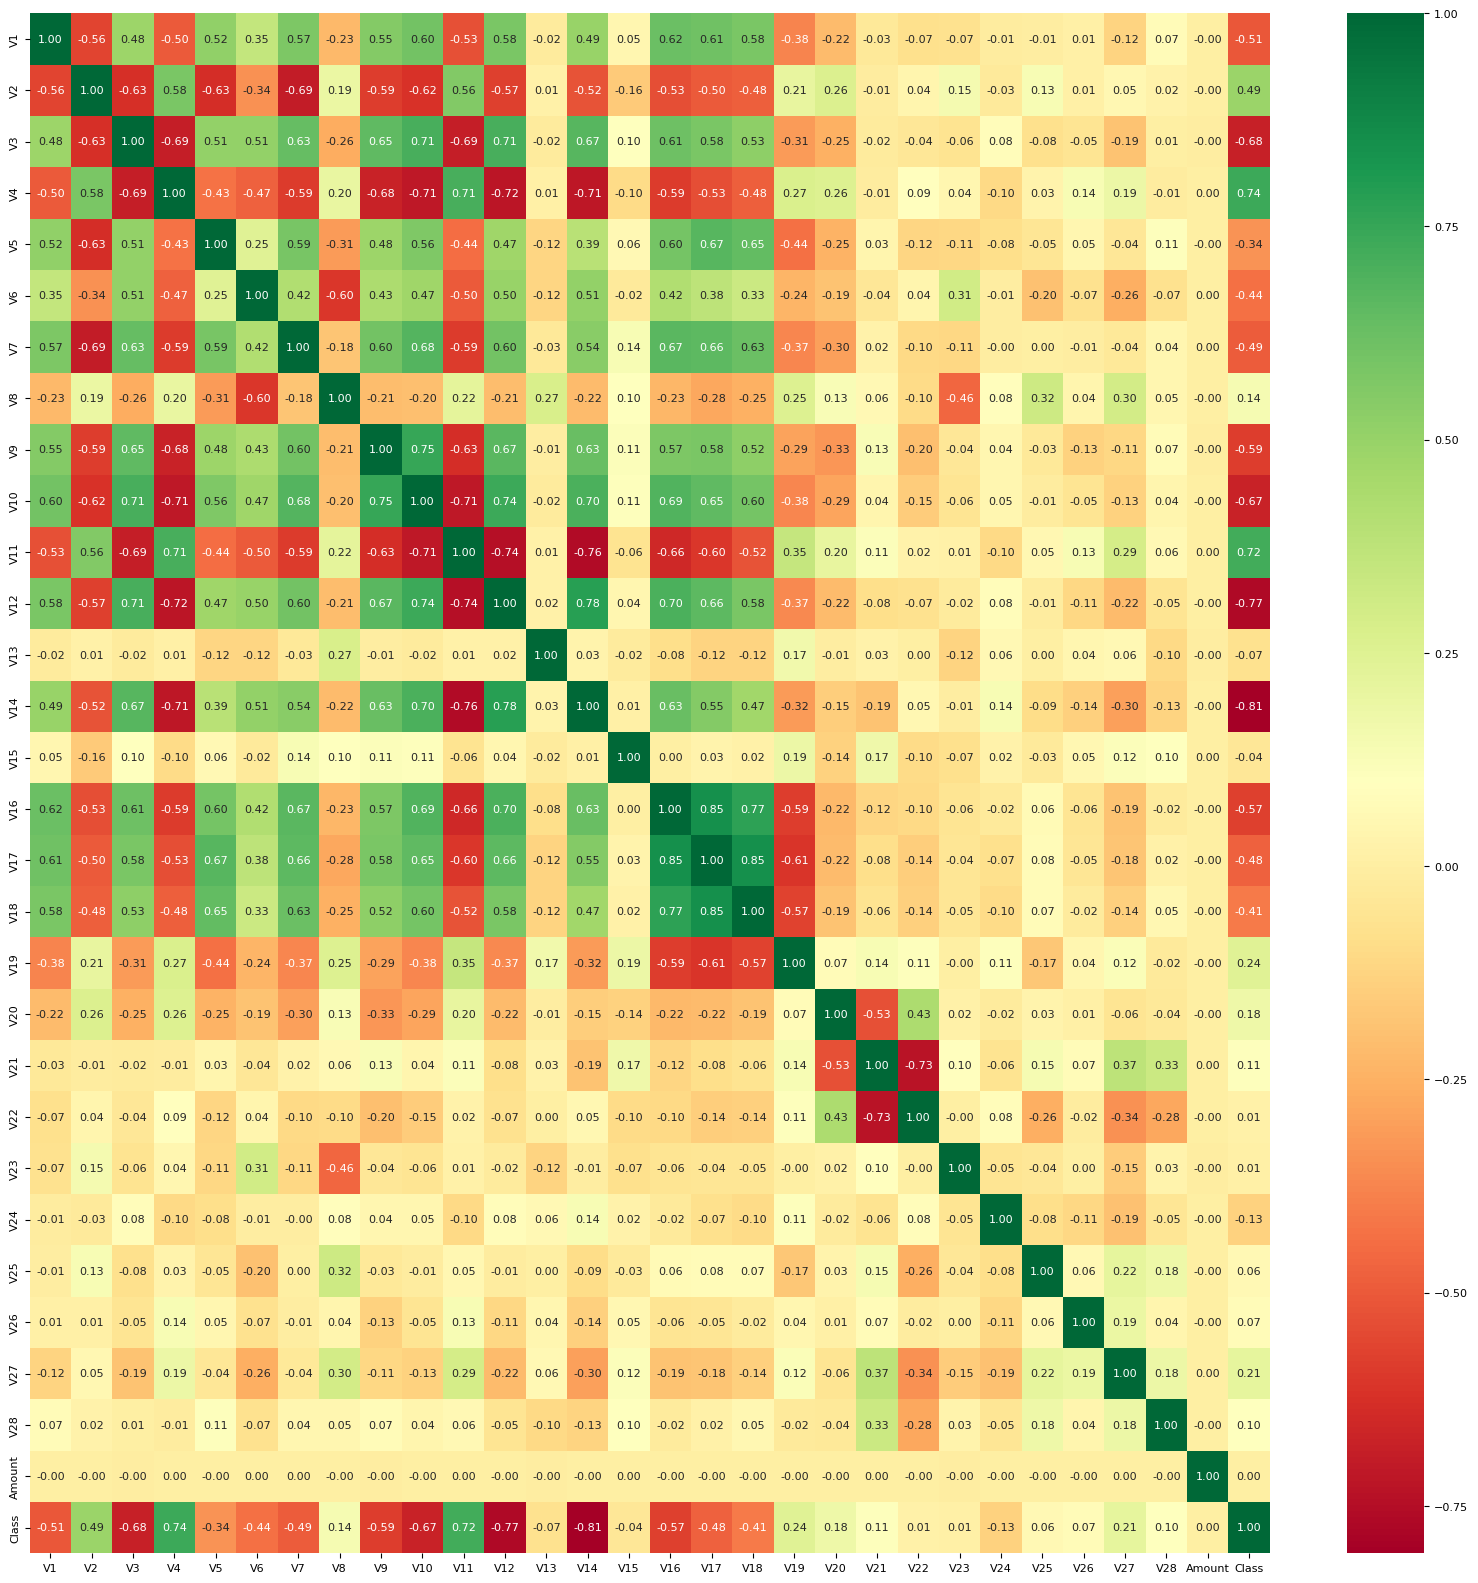

In [11]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 8})
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',fmt=".2f")

plt.show()

### Distribution

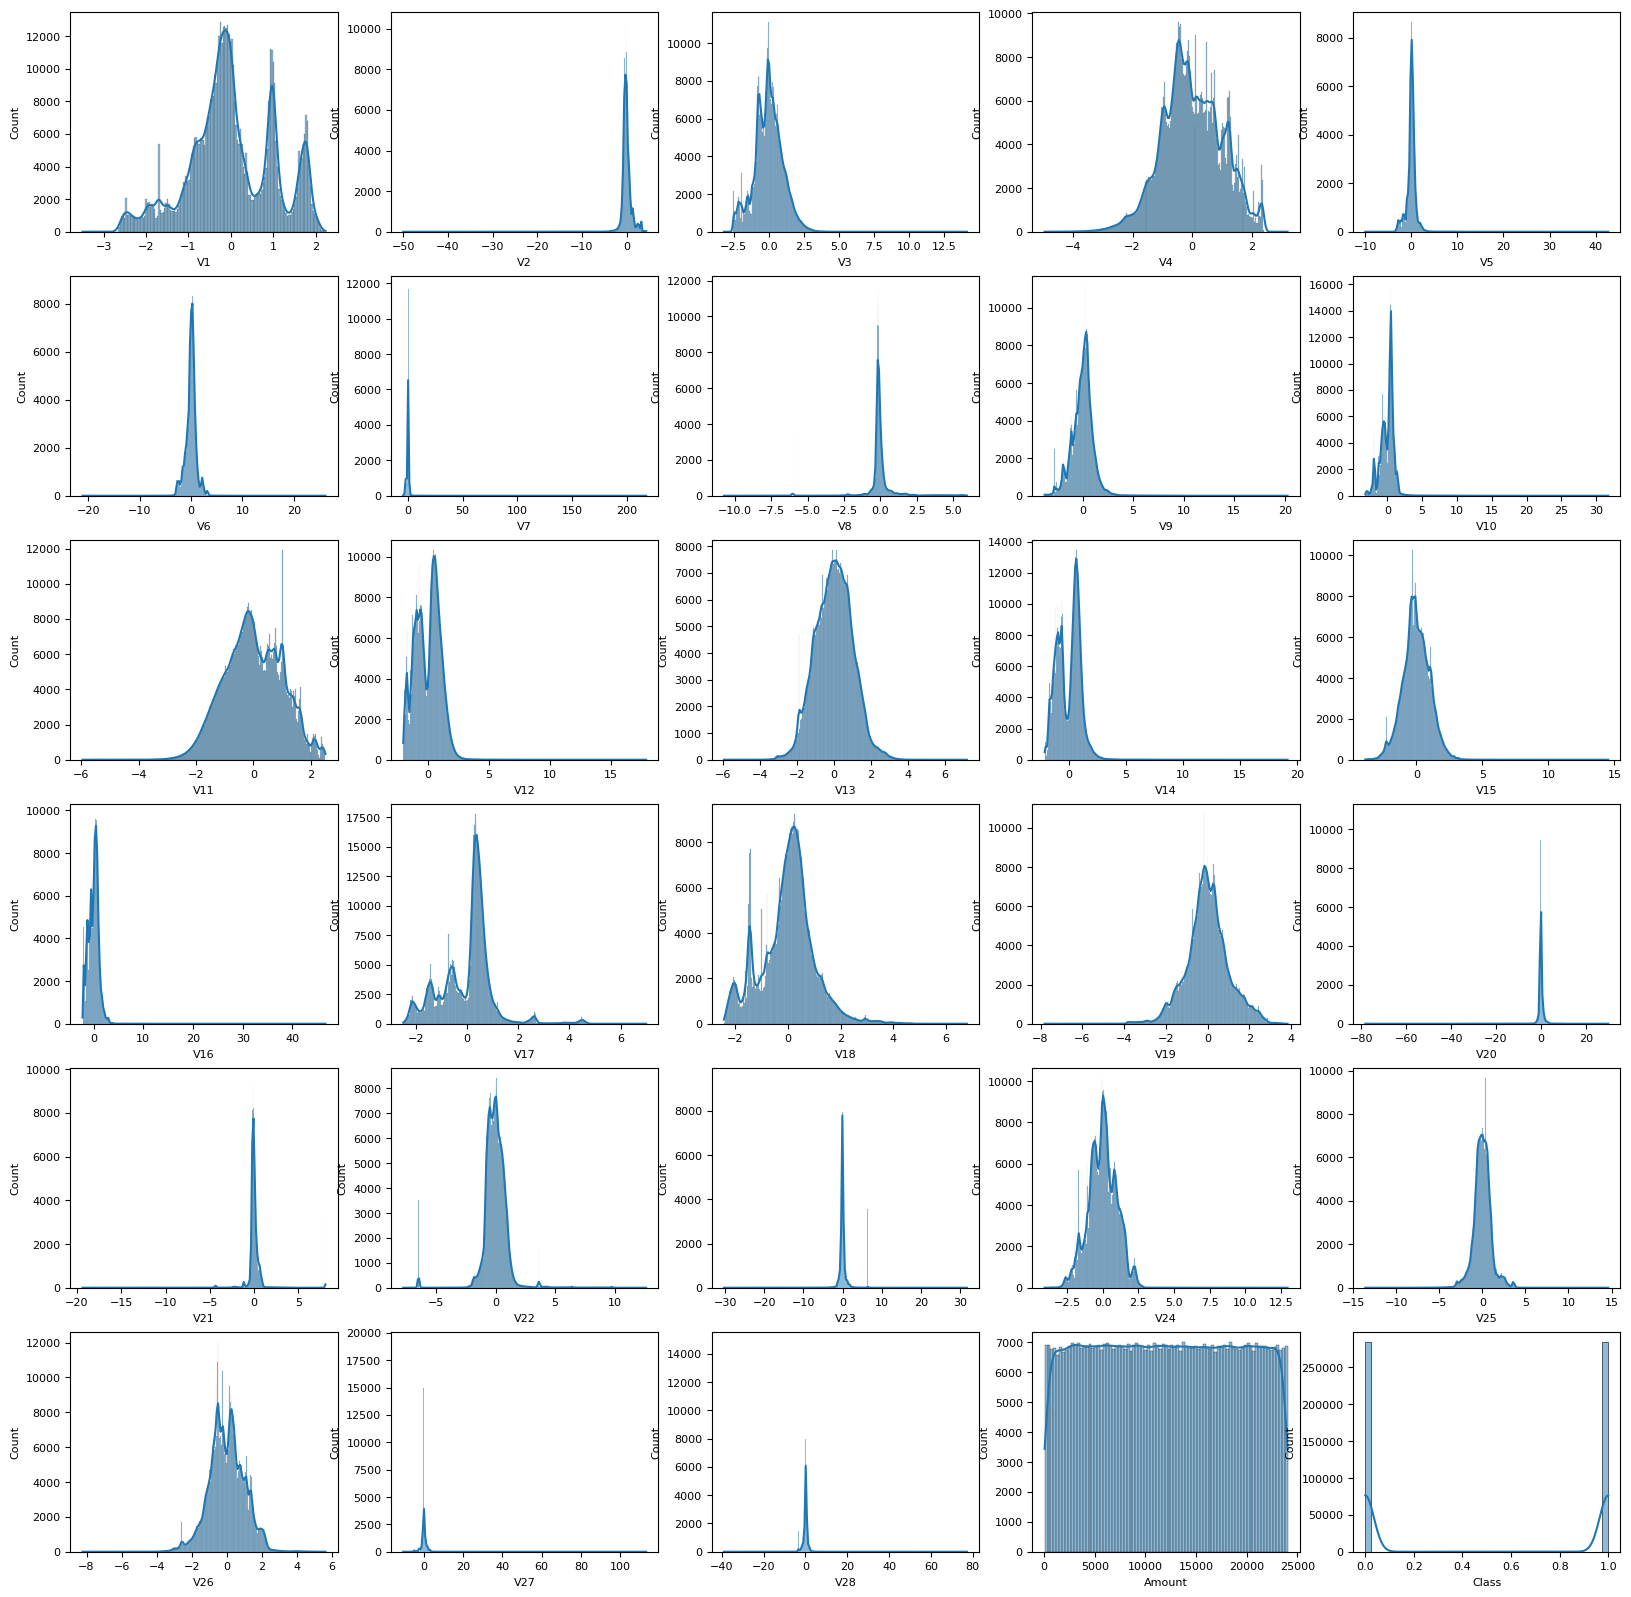

In [12]:
fig, axList = plt.subplots(nrows=6, ncols=5)
axList = axList.flatten()
fig.set_size_inches(20,20)
x=0
for col in df.columns:
    sns.histplot(df[col],hue= 'Class', kde=True,ax=axList[x])
    x+=1

<Axes: xlabel='V7', ylabel='V2'>

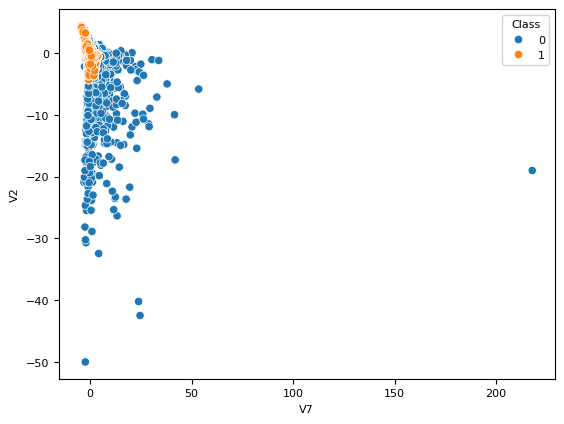

In [13]:
sns.scatterplot(df,x='V7',y='V2',hue='Class')

<Axes: xlabel='V14', ylabel='V11'>

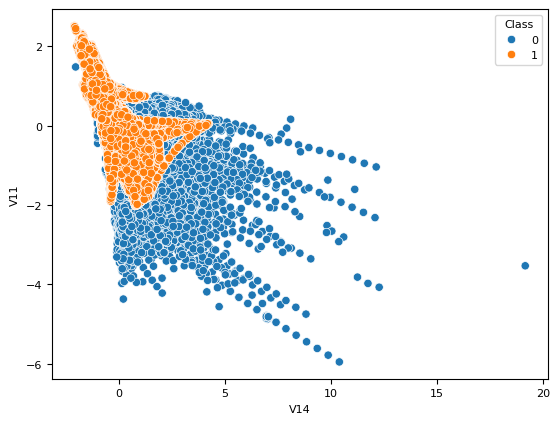

In [14]:
sns.scatterplot(df,x='V14',y='V11',hue='Class')

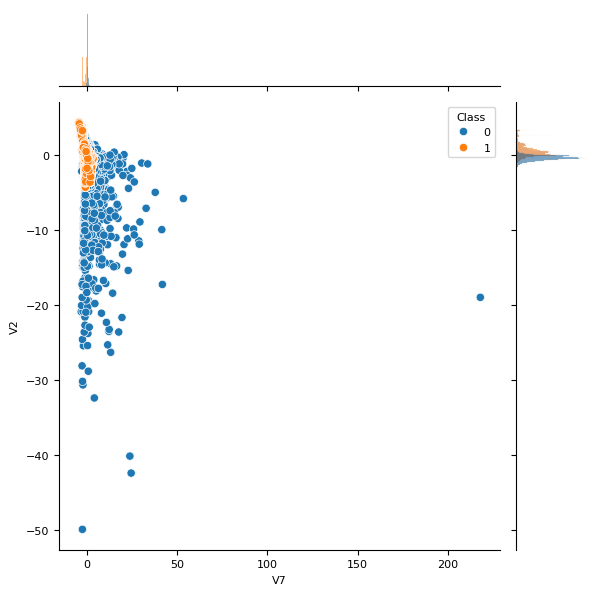

In [15]:
# sns.scatterplot(df,x='V22',y='V21',hue='Class')

g = sns.JointGrid(data=df, x="V7", y="V2",hue='Class')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)

<Axes: xlabel='V12', ylabel='V4'>

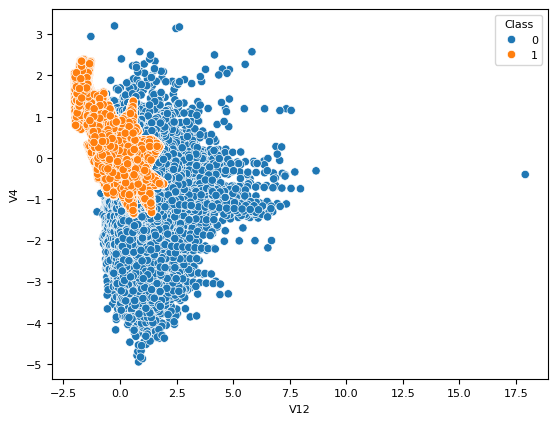

In [16]:
sns.scatterplot(df,x='V12',y='V4',hue='Class')

<Axes: >

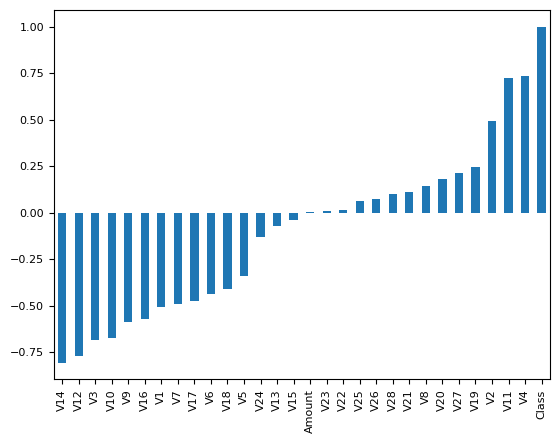

In [17]:
df.corr()['Class'].sort_values().plot(kind='bar')

### Outlier , mean and median

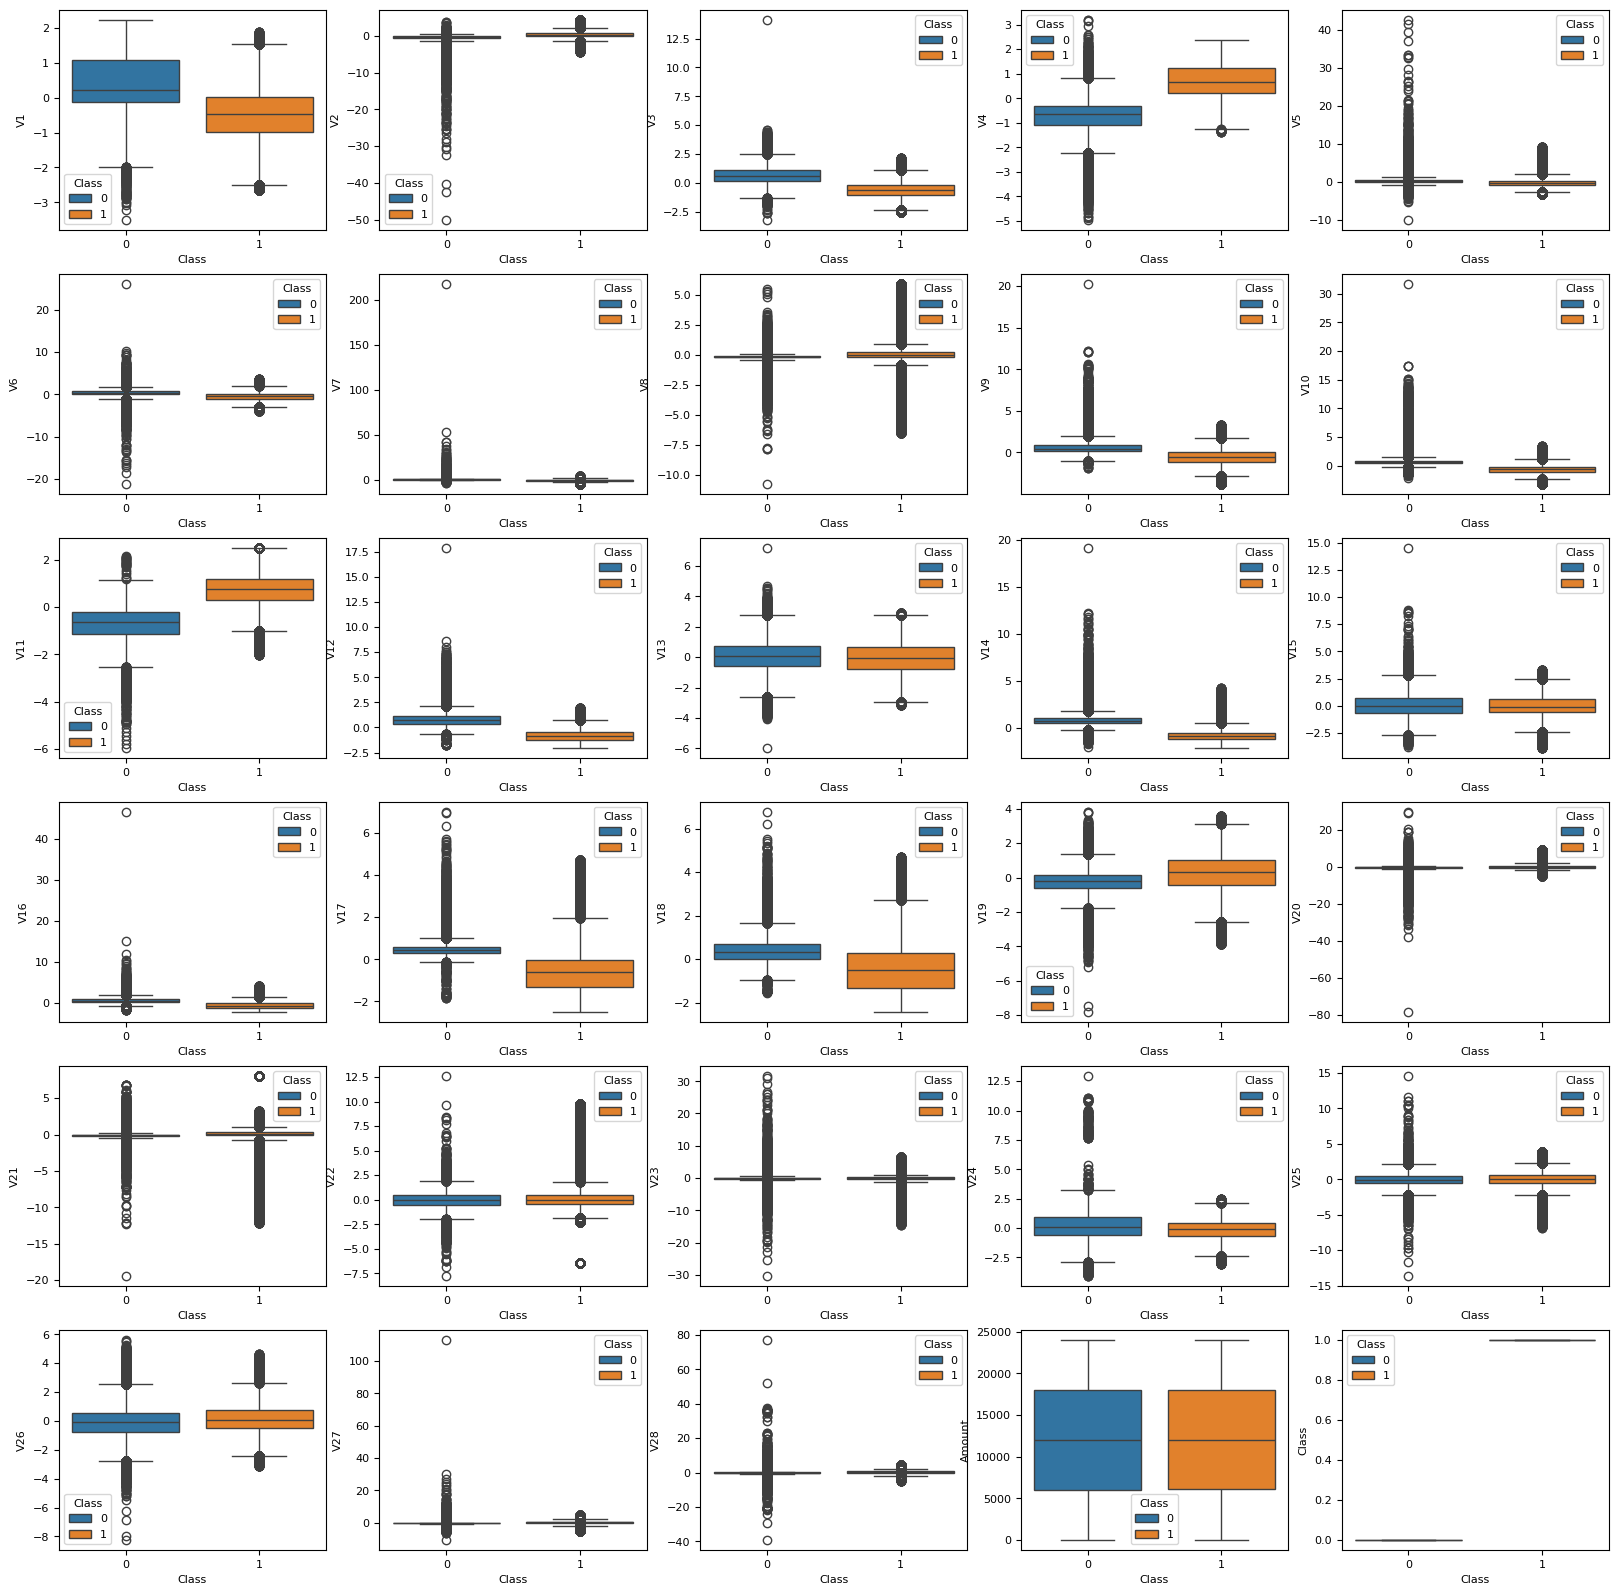

In [18]:
fig, axList = plt.subplots(nrows=6, ncols=5)
axList = axList.flatten()
fig.set_size_inches(20,20)
x=0
for col in df.columns:
    sns.boxplot(df,x='Class',y=col,ax=axList[x],hue='Class')
    x+=1


# Feature Selection

In [28]:
X = df.drop('Class',axis=1)
feature_cols=X.columns
y = df['Class']

In [22]:
f_selected = df.drop(['Class','V7','Amount'],axis=1).columns

# Train Test Split

In [29]:
# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(X, y))

data = df.reset_index()
data = StandardScaler(data)
# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Class']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Class']

In [ ]:
train_idx_sel, test_idx_sel = next(strat_shuff_split.split(X_sel, y))

data = df.reset_index()
data = StandardScaler(data)
# Create the data sets
X_train_sel = data.loc[train_idx, f_selected]
y_train = data.loc[train_idx, 'Class']

X_test_sel = data.loc[test_idx, f_selected]
y_test = data.loc[test_idx, 'Class']

# LogisticRegression

### Helper Functions

In [19]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [20]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

### L2 Penalty

In [24]:
l2_nc = LogisticRegression(penalty='l2',solver='newton-cholesky',multi_class='ovr',max_iter=1000)
l2_nc.fit(X_train,y_train)
l2_nc_predit = l2_nc.predict(X_test)
evaluate_metrics(y_test,l2_nc_predit)

{'accuracy': 0.964546365826636,
 'recall': array([0.97808768, 0.95100505]),
 'precision': array([0.95229697, 0.97747772]),
 'f1score': array([0.96502004, 0.96405969])}

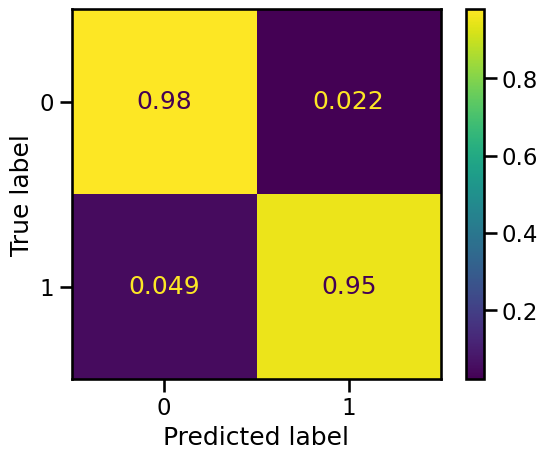

In [25]:
cf = confusion_matrix(y_test, l2_nc_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l2_nc.classes_)
disp.plot()
plt.show()

In [30]:
coef_dict = get_feature_coefs(l2_nc, 0, feature_cols)

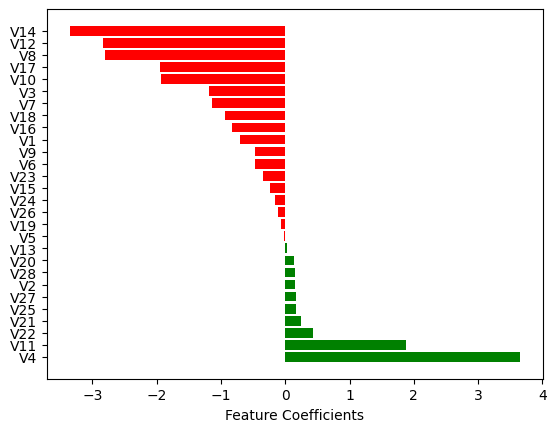

In [31]:
visualize_coefs(coef_dict)

### L1 Penalty

In [32]:
l1 = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr',l1_ratio=0.7,max_iter=1000)
l1.fit(X_train,y_train)
l1_predit = l1.predict(X_test)
evaluate_metrics(y_test,l1_predit)

{'accuracy': 0.9645199866345426,
 'recall': array([0.97821079, 0.95082919]),
 'precision': array([0.95213968, 0.97759737]),
 'f1score': array([0.96499918, 0.96402749])}

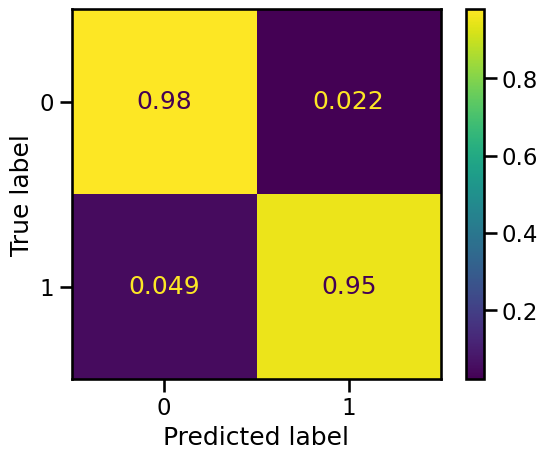

In [33]:
cf = confusion_matrix(y_test, l1_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1.classes_)
disp.plot()
plt.show()

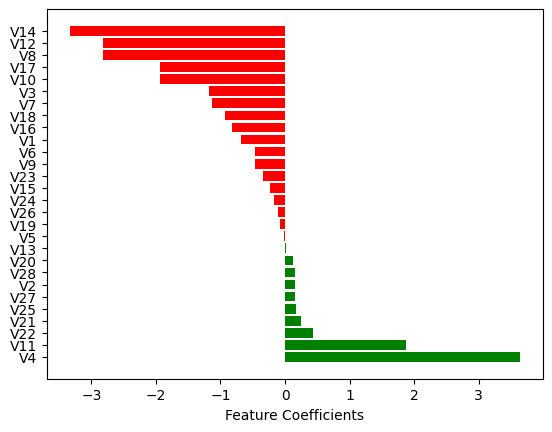

In [35]:
coef_dict = get_feature_coefs(l1, 0, feature_cols)
visualize_coefs(coef_dict)

### Elasticnet

In [50]:
els = LogisticRegression(penalty='elasticnet',solver='saga',multi_class='ovr',l1_ratio=0.51,max_iter=1000)
els.fit(X_train,y_train)
els_predit = els.predict(X_test)
evaluate_metrics(y_test,els_predit)

{'accuracy': 0.9147248650264671,
 'recall': array([0.99957793, 0.8298718 ]),
 'precision': array([0.85455475, 0.99949167]),
 'f1score': array([0.92139476, 0.90681809])}

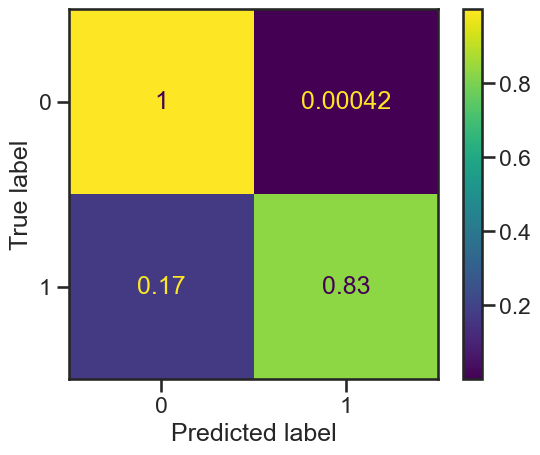

In [51]:
cf = confusion_matrix(y_test, els_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=els.classes_)
disp.plot()
plt.show()

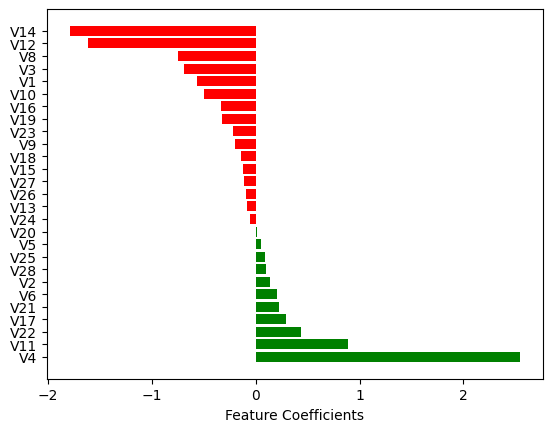

In [52]:
coef_dict = get_feature_coefs(non, 0, feature_cols)
visualize_coefs(coef_dict)

In [38]:
els_sel = LogisticRegression(penalty='elasticnet',solver='saga',multi_class='ovr',l1_ratio=0.5,max_iter=1000)
els_sel.fit(X_train_sel,y_train)
els_sel_predit = els_sel.predict(X_test_sel)
evaluate_metrics(y_test,els_sel_predit)

{'accuracy': 0.9644408490582629,
 'recall': array([0.97877354, 0.95010815]),
 'precision': array([0.95149847, 0.97814712]),
 'f1score': array([0.96494331, 0.96392378])}

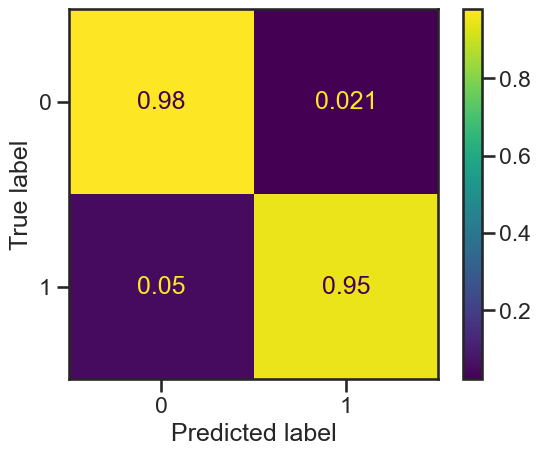

In [49]:
cf = confusion_matrix(y_test, els_sel_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=els_sel.classes_)
disp.plot()
plt.show()

### LogisticRegression with Default Hyper Parameter

In [40]:
non = LogisticRegression()
non.fit(X_train,y_train)
non_predit = non.predict(X_test)
evaluate_metrics(y_test,non_predit)

{'accuracy': 0.9585846684135554,
 'recall': array([0.98156974, 0.9355996 ]),
 'precision': array([0.93842998, 0.98068167]),
 'f1score': array([0.95951521, 0.95761034])}

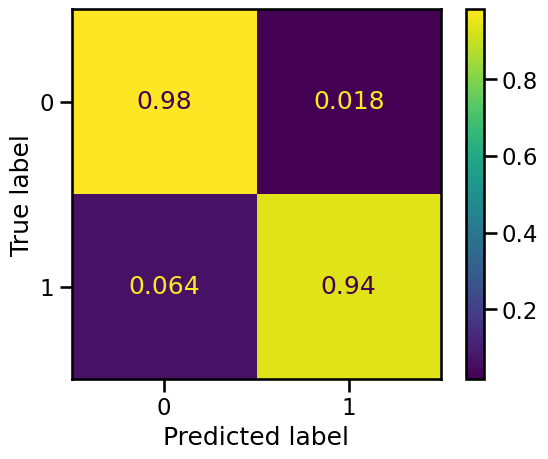

In [41]:
cf = confusion_matrix(y_test,non_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=non.classes_)
disp.plot()
plt.show()

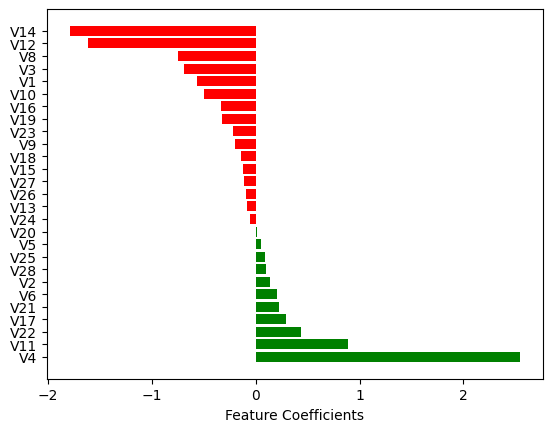

In [43]:
coef_dict = get_feature_coefs(non, 0, feature_cols)
visualize_coefs(coef_dict)

### Elasticnet with Selected Features

In [ ]:
els = LogisticRegression(penalty='elasticnet',solver='saga',multi_class='ovr',l1_ratio=0.5,max_iter=1000)
els.fit(X_train_sel,y_train)
els_predit = els.predict(X_test_sel)
evaluate_metrics(y_test,els_predit)

{'accuracy': 0.9634208536306561,
 'recall': array([0.97799975, 0.94884195]),
 'precision': array([0.95029135, 0.97733901]),
 'f1score': array([0.96394647, 0.96287968])}

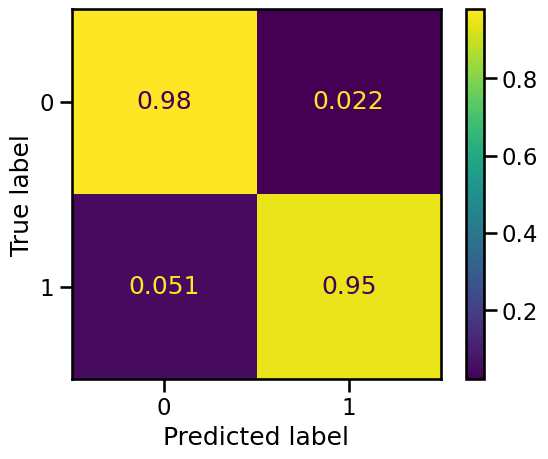

In [75]:
cf = confusion_matrix(y_test,els_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=els.classes_)
disp.plot()
plt.show()

# K Neighbors Classsifier

### Finding no. of K

In [44]:
max_k = 10
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

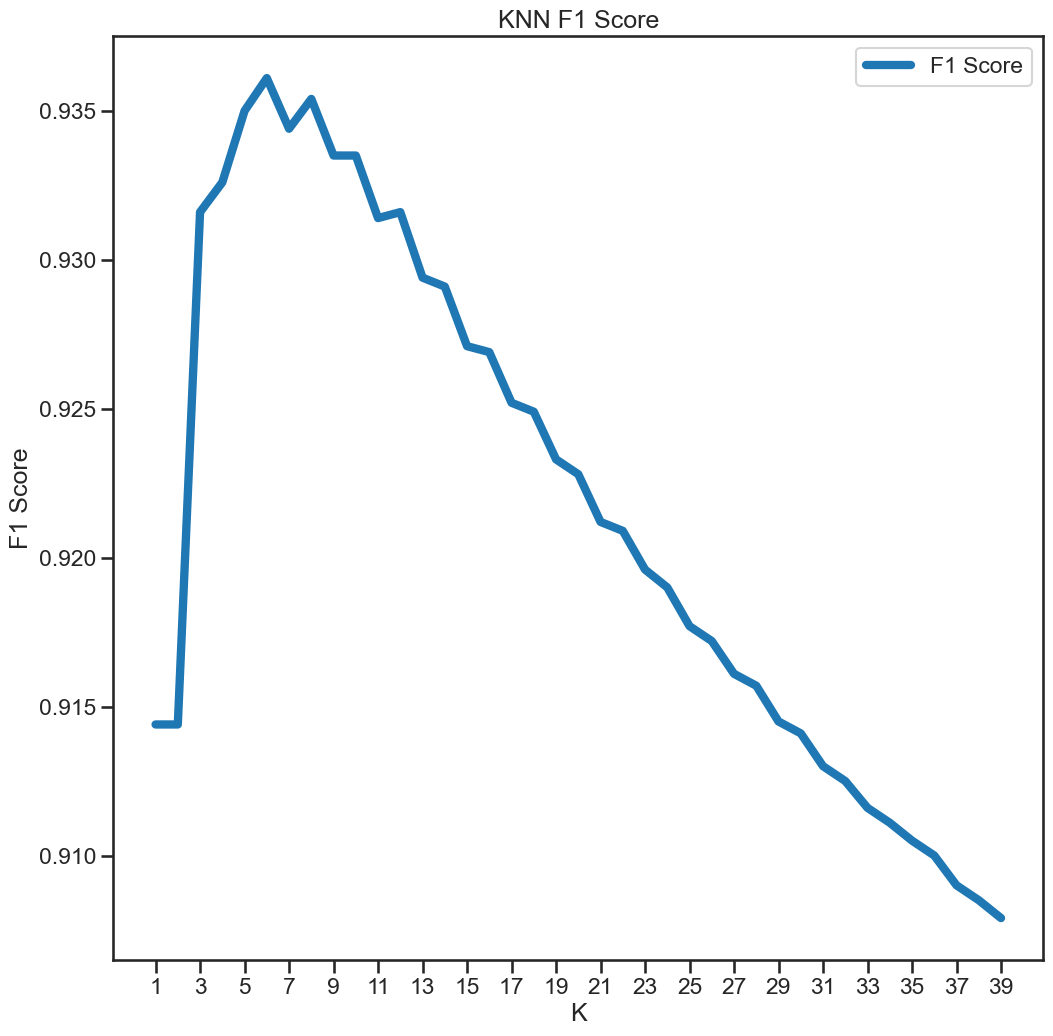

In [45]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

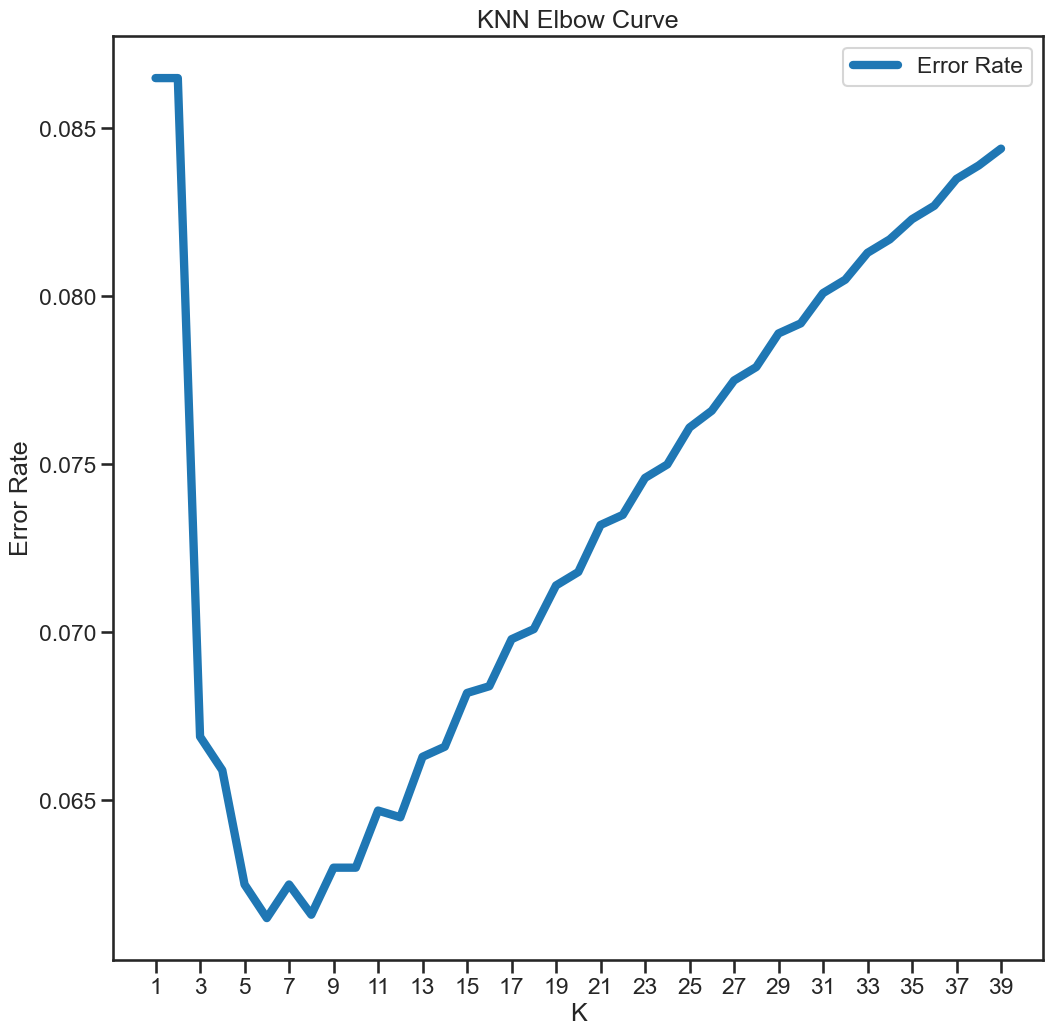

In [46]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

### KNN with K = 6 with all features

In [47]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn = knn.fit(X_train, y_train)
knn_predit = knn.predict(X_test)
evaluate_metrics(y_test,knn_predit)

{'accuracy': 0.9385452754866961,
 'recall': array([0.97618838, 0.90090217]),
 'precision': array([0.90784051, 0.97424974]),
 'f1score': array([0.9407747 , 0.93614144])}

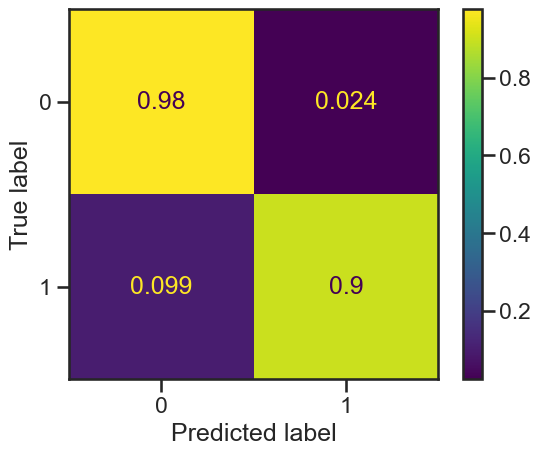

In [48]:
cf = confusion_matrix(y_test,knn_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()

### KNN with select features and k = 6

In [61]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn = knn.fit(X_train_sel, y_train)
knn_predit = knn.predict(X_test_sel)
evaluate_metrics(y_test,knn_predit)

{'accuracy': 0.9992174173012328,
 'recall': array([0.99843483, 1.        ]),
 'precision': array([1.        , 0.99843728]),
 'f1score': array([0.9992168 , 0.99921803])}

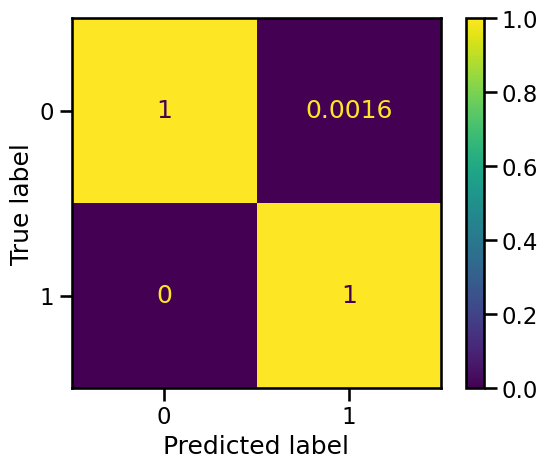

In [62]:
cf = confusion_matrix(y_test,knn_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()

### KNN Cross validation

In [65]:
X = df[f_selected]

sf = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

predictions = cross_val_predict(knn, X, y, cv=sf)
evaluate_metrics(y,predictions)

{'accuracy': 0.9991171748187306,
 'recall': array([0.99823435, 1.        ]),
 'precision': array([1.        , 0.99823746]),
 'f1score': array([0.9991164 , 0.99911795])}

# DecisionTreeClassifier

### GridSearch for max_depth of tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2)}

GR_sugar = GridSearchCV(DecisionTreeClassifier(random_state=123,max_features=6),
                     param_grid=param_grid,
                     scoring='accuracy',
                      n_jobs=-2)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [ ]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

### Decision Tree with best hyper parameter 

In [66]:
dr = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36).fit(X_train, y_train)
dr_predit = dr.predict(X_test)
evaluate_metrics(y_test,dr_predit)

{'accuracy': 0.9977753548001337,
 'recall': array([0.99697519, 0.99857552]),
 'precision': array([0.99857324, 0.99698002]),
 'f1score': array([0.99777357, 0.99777713])}

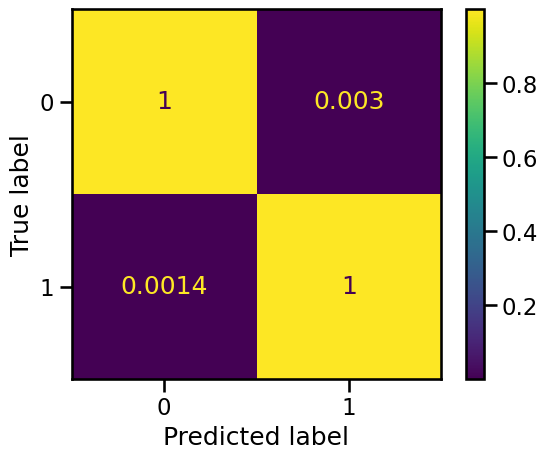

In [67]:
cf = confusion_matrix(y_test,dr_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

### Decision Tree with selected features

In [69]:
dr = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36).fit(X_train_sel, y_train)
dr_predit = dr.predict(X_test_sel)
evaluate_metrics(y_test,dr_predit)

{'accuracy': 0.9977753548001337,
 'recall': array([0.99697519, 0.99857552]),
 'precision': array([0.99857324, 0.99698002]),
 'f1score': array([0.99777357, 0.99777713])}

### Decision Tree Cross Validation

In [ ]:
sf = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)
dt = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36)

predictions = cross_val_predict(dt, X, y, cv=sf)
evaluate_metrics(y,predictions)

### Decision Tree Graph

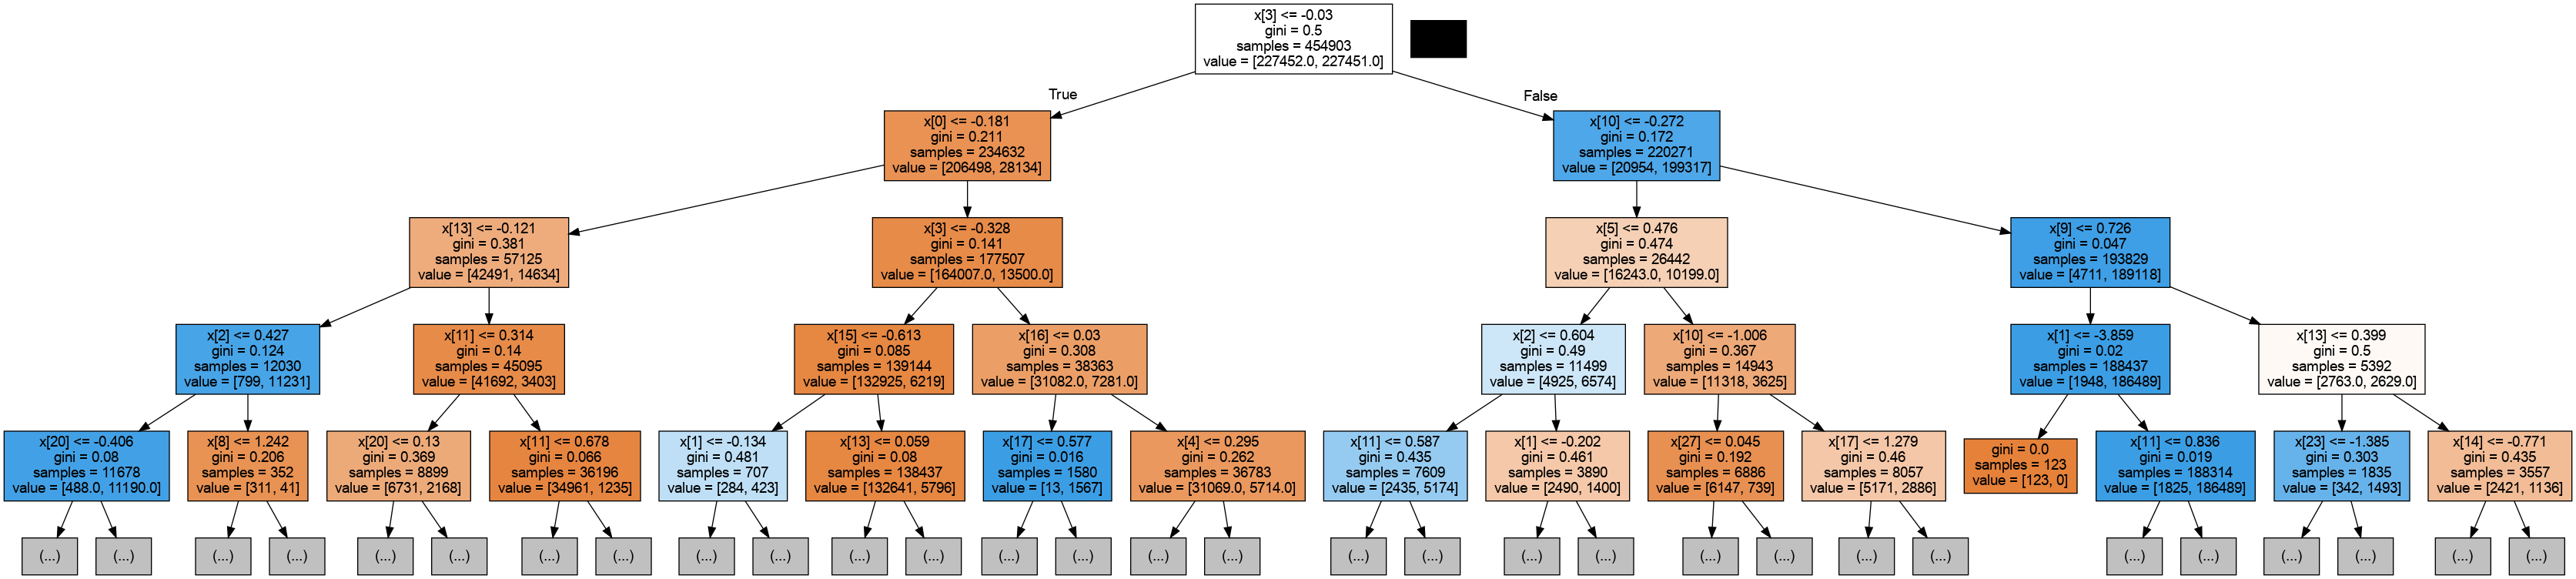

In [73]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dr, out_file=dot_data, filled=True,max_depth=4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

# SVM

In [85]:
from sklearn.svm import SVC
kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

In [87]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_predict = svc.predict(X_test)
evaluate_metrics(y_test,svc_predict)

In [ ]:
cf = confusion_matrix(y_test,svc_predict, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cStandardScalerisp.plot()
plt.show()